In [ ]:
 #Installing and importing all the required libraries
!pip install keras-vggface
!pip install mtcnn
%tensorflow_version 1.7
import numpy as np
from numpy import *
import keras_vggface
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions 
#import kerasvgg_face
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from PIL import *
import cv2
from keras import *
from keras.applications import *
from keras_vggface.vggface import VGGFace


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.7`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
#Face detection using MTCNN
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pi = pyplot.imread(filename)
  
	# creating the detector
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pi)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pi[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array



In [ ]:
def load_image(imagefile):
 # load the photo and extract the face
 pixels = extract_face(imagefile)
 return pixels

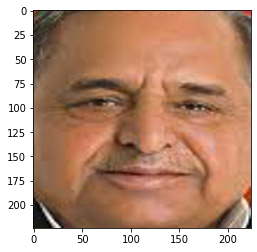

In [ ]:
#Processing my image for dataset
my_image=load_image('/content/mulayam.jpg')
pyplot.imshow(my_image)
np.save('Adarsh',my_image)

In [ ]:
from keras_vggface.utils import decode_predictions
# convert one face into samples
my_image = my_image.astype('float32')        
samples = expand_dims(my_image, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction      
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

b' Mulayam_Singh_Yadav': 96.892%
b' Akhilesh_Yadav': 0.265%
b' Farooq_Sheikh': 0.231%
b' Naveen_Patnaik': 0.152%
b' Pawan_Kumar_Bansal': 0.111%
